In [1]:
#!pip install pymongo

In [71]:
import json
import pymongo
import pandas as pd
import os
import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import pandas.io.sql as sqlio
import psycopg2

In [3]:
from pymongo import MongoClient
client = MongoClient(host = '192.168.56.30:27017')

In [4]:
db = client['test8_database']

In [5]:
collection4 = db['COVID-19_deaths_by_race_and_Hispanic_group-collection']

In [6]:
collection5 = db['Conditions_contributing_to_deaths_involving_COVID-19-collection']

new one

In [7]:
import json
dict_data = []
headers = []
with open("Deaths_involving_coronavirus_disease_2019__COVID-19__by_race_and_Hispanic_origin_group_and_age__by_state.json") as f:
    json_data = json.load(f)
    for val in json_data["meta"]["view"]["columns"]:
        headers.append(val["name"])
    for val in json_data["data"]:
        row = {}
        for i in range(len(val)):
            row[headers[i]] = val[i]
        dict_data.append(row)

# print(dict_data)
print(len(dict_data))

In [8]:
collection4.insert_many(dict_data)

In [9]:
dict_data = []
headers = []
with open("Conditions_contributing_to_deaths_involving_coronavirus_disease_2019__COVID-19___by_age_group_and_state__United_States.json", encoding='utf8') as f:
    json_data = json.load(f)
    for val in json_data["meta"]["view"]["columns"]:
        headers.append(val["name"])
    for val in json_data["data"]:
        row = {}
        for i in range(len(val)):
            row[headers[i]] = val[i]
        dict_data.append(row)

# print(dict_data)
print(len(dict_data))

In [10]:
collection5.insert_many(dict_data)

In [11]:
df_deaths_by_race = pd.DataFrame(list(collection4.find()))

In [12]:
df_Conditions_contributing_to_deaths = pd.DataFrame(list(collection5.find()))

In [13]:
df_Conditions_contributing_to_deaths.head()

,_id,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,Data As Of,...,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,606e309025a5cb447cbed53c,row-bb4i~3f8k.wfuf,00000000-0000-0000-1E12-3FD61F1FFF49,0,1617812442,None,1617812442,None,{ },2021-04-04T00:00:00,...,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,350,362,None
1,606e309025a5cb447cbed53d,row-g7b4.72zd_ivca,00000000-0000-0000-56A1-C28C79B25B89,0,1617812442,None,1617812442,None,{ },2021-04-04T00:00:00,...,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1603,1639,None
2,606e309025a5cb447cbed53e,row-rniz~caqk_eecx,00000000-0000-0000-AFA8-640BE9B7C5E2,0,1617812442,None,1617812442,None,{ },2021-04-04T00:00:00,...,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,4314,4422,None
3,606e309025a5cb447cbed53f,row-j78h_x6ty.kbkp,00000000-0000-0000-1521-0AE99D708FC3,0,1617812442,None,1617812442,None,{ },2021-04-04T00:00:00,...,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,12922,13272,None
4,606e309025a5cb447cbed540,row-ctxw_tbim-4tyr,00000000-0000-0000-0C79-564CAC4DAA68,0,1617812442,None,1617812442,None,{ },2021-04-04T00:00:00,...,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,33277,34129,None


In [14]:
df_deaths_by_race.head()

,_id,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,Data as of,...,State,Age group,Race and Hispanic Origin Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,606e2f3025a5cb447cbebbe2,row-czuu~ub9b_59ux,00000000-0000-0000-6D86-7F20A72018AC,0,1617812512,None,1617812512,None,{ },2021-04-07T00:00:00,...,United States,All Ages,Total Deaths,539723,4160118,466386,263173,9031,750721,None
1,606e2f3025a5cb447cbebbe3,row-ypps-279h~m7ar,00000000-0000-0000-471C-6E3702D46824,0,1617812512,None,1617812512,None,{ },2021-04-07T00:00:00,...,United States,All Ages,Non-Hispanic White,328239,3047347,301454,149830,6038,485501,None
2,606e2f3025a5cb447cbebbe4,row-b8zs_kvf6_8e6u,00000000-0000-0000-6DF3-0A215265E02C,0,1617812512,None,1617812512,None,{ },2021-04-07T00:00:00,...,United States,Under 1 year,Non-Hispanic White,14,9139,98,1,10,121,None
3,606e2f3025a5cb447cbebbe5,row-i726_3t48~vrkt,00000000-0000-0000-E2E3-EDFA24295CA7,0,1617812512,None,1617812512,None,{ },2021-04-07T00:00:00,...,United States,0-17 years,Non-Hispanic White,72,16860,287,14,84,429,None
4,606e2f3025a5cb447cbebbe6,row-hnsv.anpj~2g9m,00000000-0000-0000-B6C2-8821981747BF,0,1617812512,None,1617812512,None,{ },2021-04-07T00:00:00,...,United States,1-4 years,Non-Hispanic White,12,1802,59,2,25,94,None


In [15]:
df_deaths_by_race.columns

Index(['_id', 'sid', 'id', 'position', 'created_at', 'created_meta',
       'updated_at', 'updated_meta', 'meta', 'Data as of', 'Start Date',
       'End Date', 'State', 'Age group', 'Race and Hispanic Origin Group',
       'COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'],
      dtype='object')

In [16]:
df_Conditions_contributing_to_deaths.columns

Index(['_id', 'sid', 'id', 'position', 'created_at', 'created_meta',
       'updated_at', 'updated_meta', 'meta', 'Data As Of', 'Start Date',
       'End Date', 'Group', 'Year', 'Month', 'State', 'Condition Group',
       'Condition', 'ICD10_codes', 'Age Group', 'COVID-19 Deaths',
       'Number of Mentions', 'Flag'],
      dtype='object')

In [17]:
to_drop= ['_id','sid', 'id', 'position', 'created_at', 'created_meta',
       'updated_at', 'updated_meta', 'meta','Footnote']
df_deaths_by_race.drop(columns=to_drop, inplace=True)
df_deaths_by_race.columns

Index(['Data as of', 'Start Date', 'End Date', 'State', 'Age group',
       'Race and Hispanic Origin Group', 'COVID-19 Deaths', 'Total Deaths',
       'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths'],
      dtype='object')

As 'Age Group' and 'State' are already present in our dataframe so we will drop it as well

In [18]:
to_drop= ['_id','sid', 'id', 'position', 'created_at', 'created_meta',
       'updated_at', 'updated_meta', 'meta','Age Group','State', 'Number of Mentions', 'Flag']
df_Conditions_contributing_to_deaths.drop(columns=to_drop, inplace=True)
df_Conditions_contributing_to_deaths.columns

Index(['Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'Condition Group', 'Condition', 'ICD10_codes', 'COVID-19 Deaths'],
      dtype='object')

In [19]:
print(df_Conditions_contributing_to_deaths.shape, df_deaths_by_race.shape)

(235980, 10) (6489, 12)


In [20]:
print("Unique Start Dates in df__deaths_by_race = ", df_deaths_by_race['Start Date'].unique())

print("\n\nUnique Start Dates in df__Conditions_contributing_to_deaths = ", df_Conditions_contributing_to_deaths['Start Date'].unique())

Unique Start Dates in df__deaths_by_race =  ['2020-01-01T00:00:00']


Unique Start Dates in df__Conditions_contributing_to_deaths =  ['2020-01-01T00:00:00' '2021-01-01T00:00:00' '2020-02-01T00:00:00'
 '2020-03-01T00:00:00' '2020-04-01T00:00:00' '2020-05-01T00:00:00'
 '2020-06-01T00:00:00' '2020-07-01T00:00:00' '2020-08-01T00:00:00'
 '2020-09-01T00:00:00' '2020-10-01T00:00:00' '2020-11-01T00:00:00'
 '2020-12-01T00:00:00' '2021-02-01T00:00:00' '2021-03-01T00:00:00'
 '2021-04-01T00:00:00']


In [21]:
df_Conditions_contributing_to_deaths=df_Conditions_contributing_to_deaths[df_Conditions_contributing_to_deaths["Start Date"]=='2020-01-01T00:00:00']

In [22]:
print(df_Conditions_contributing_to_deaths.shape, df_deaths_by_race.shape)

(37260, 10) (6489, 12)


In [23]:
print("Unique Start Dates in df__deaths_by_race = ", df_deaths_by_race['Start Date'].unique())

print("\n\nUnique Start Dates in df__Conditions_contributing_to_deaths = ", df_Conditions_contributing_to_deaths['Start Date'].unique())

Unique Start Dates in df__deaths_by_race =  ['2020-01-01T00:00:00']


Unique Start Dates in df__Conditions_contributing_to_deaths =  ['2020-01-01T00:00:00']


In [78]:
df_combine = df_deaths_by_race.join(df_Conditions_contributing_to_deaths,rsuffix='_conditions')

In [79]:
df_combine.shape

(6489, 22)

In [80]:
df_combine.head()

,Data as of,Start Date,End Date,State,Age group,Race and Hispanic Origin Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,...,Data As Of,Start Date_conditions,End Date_conditions,Group,Year,Month,Condition Group,Condition,ICD10_codes,COVID-19 Deaths_conditions
0,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,All Ages,Total Deaths,539723,4160118,466386,263173,...,2021-04-04T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,By Total,None,None,Respiratory diseases,Influenza and pneumonia,J09-J18,350
1,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,All Ages,Non-Hispanic White,328239,3047347,301454,149830,...,2021-04-04T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,By Total,None,None,Respiratory diseases,Influenza and pneumonia,J09-J18,1603
2,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,Under 1 year,Non-Hispanic White,14,9139,98,1,...,2021-04-04T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,By Total,None,None,Respiratory diseases,Influenza and pneumonia,J09-J18,4314
3,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,0-17 years,Non-Hispanic White,72,16860,287,14,...,2021-04-04T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,By Total,None,None,Respiratory diseases,Influenza and pneumonia,J09-J18,12922
4,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,1-4 years,Non-Hispanic White,12,1802,59,2,...,2021-04-04T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,By Total,None,None,Respiratory diseases,Influenza and pneumonia,J09-J18,33277


In [81]:
df_combine.isnull().sum()

Data as of                                     0
Start Date                                     0
End Date                                       0
State                                          0
Age group                                      0
Race and Hispanic Origin Group                 0
COVID-19 Deaths                             1730
Total Deaths                                1684
Pneumonia Deaths                            1923
Pneumonia and COVID-19 Deaths               1505
Influenza Deaths                            1229
Pneumonia, Influenza, or COVID-19 Deaths    1998
Data As Of                                     0
Start Date_conditions                          0
End Date_conditions                            0
Group                                          0
Year                                        6489
Month                                       6489
Condition Group                                0
Condition                                      0
ICD10_codes         

In [28]:
df_combine.shape

(6489, 22)

In [29]:
df_combine.columns

Index(['Data as of', 'Start Date', 'End Date', 'State', 'Age group',
       'Race and Hispanic Origin Group', 'COVID-19 Deaths', 'Total Deaths',
       'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Data As Of',
       'Start Date_conditions', 'End Date_conditions', 'Group', 'Year',
       'Month', 'Condition Group', 'Condition', 'ICD10_codes',
       'COVID-19 Deaths_conditions'],
      dtype='object')

In [30]:
df_combine.dtypes

Data as of                                  object
Start Date                                  object
End Date                                    object
State                                       object
Age group                                   object
Race and Hispanic Origin Group              object
COVID-19 Deaths                             object
Total Deaths                                object
Pneumonia Deaths                            object
Pneumonia and COVID-19 Deaths               object
Influenza Deaths                            object
Pneumonia, Influenza, or COVID-19 Deaths    object
Data As Of                                  object
Start Date_conditions                       object
End Date_conditions                         object
Group                                       object
Year                                        object
Month                                       object
Condition Group                             object
Condition                      

In [31]:
"""
data_file = "test.json"
with open(data_file) as file:
    json_data = json.load(file)
"""
#collection.insert_many(json_data)
#for post in collection.find():
#    pprint.pprint(post)

'\ndata_file = "test.json"\nwith open(data_file) as file:\n    json_data = json.load(file)\n'

In [32]:
# pd.set_option('display.max_rows', df.shape[0]+1)
# df.describe(include = 'all').transpose()

In [33]:
#to_drop= ['sid', 'id', 'position', 'created_at', 'created_meta',
#       'updated_at', 'updated_meta', 'meta','Data as of', 'Start Date','End Date','Footnote']

In [34]:
# df.drop(columns=to_drop, inplace=True)
# df.head()

In [35]:
#df.describe(include = 'all').transpose()

In [36]:
df_combine.dtypes

Data as of                                  object
Start Date                                  object
End Date                                    object
State                                       object
Age group                                   object
Race and Hispanic Origin Group              object
COVID-19 Deaths                             object
Total Deaths                                object
Pneumonia Deaths                            object
Pneumonia and COVID-19 Deaths               object
Influenza Deaths                            object
Pneumonia, Influenza, or COVID-19 Deaths    object
Data As Of                                  object
Start Date_conditions                       object
End Date_conditions                         object
Group                                       object
Year                                        object
Month                                       object
Condition Group                             object
Condition                      

As we can see all columns have object type and not much information is presented by describe function so we have convert the columns into appropiate datatypes before further pre-processing   

In [82]:
df_combine[['COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths','COVID-19 Deaths_conditions']]= df_combine[['COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'COVID-19 Deaths_conditions' ]].apply(pd.to_numeric)

In [83]:
df_combine.columns

Index(['Data as of', 'Start Date', 'End Date', 'State', 'Age group',
       'Race and Hispanic Origin Group', 'COVID-19 Deaths', 'Total Deaths',
       'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Data As Of',
       'Start Date_conditions', 'End Date_conditions', 'Group', 'Year',
       'Month', 'Condition Group', 'Condition', 'ICD10_codes',
       'COVID-19 Deaths_conditions'],
      dtype='object')

Label Encoding of Categorical variables by sing sci-kit learn library approach:

In [84]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df_combine['State_Cat'] = labelencoder.fit_transform(df_combine['State'])
df_combine['Age group_Cat'] = labelencoder.fit_transform(df_combine['Age group'])
df_combine['Race and Hispanic Origin Group_Cat'] = labelencoder.fit_transform(df_combine['Race and Hispanic Origin Group'])
#df_combine['Group_Cat'] = labelencoder.fit_transform(df_combine['Group'])
#df_combine['Year'] = labelencoder.fit_transform(df_combine['Year'])
#df_combine['State_conditions_Cat'] = labelencoder.fit_transform(df_combine['State_conditions'])
df_combine['Condition Group_Cat'] = labelencoder.fit_transform(df_combine['Condition Group'])
df_combine['Condition_Cat'] = labelencoder.fit_transform(df_combine['Condition'])
#df_combine['Age Group_conditions_Cat'] = labelencoder.fit_transform(df_combine['Age Group_conditions'])

  
df_combine.head()

,Data as of,Start Date,End Date,State,Age group,Race and Hispanic Origin Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,...,Month,Condition Group,Condition,ICD10_codes,COVID-19 Deaths_conditions,State_Cat,Age group_Cat,Race and Hispanic Origin Group_Cat,Condition Group_Cat,Condition_Cat
0,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,All Ages,Total Deaths,539723.0,4160118.0,466386.0,263173.0,...,None,Respiratory diseases,Influenza and pneumonia,J09-J18,350.0,46,14,7,9,11
1,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,All Ages,Non-Hispanic White,328239.0,3047347.0,301454.0,149830.0,...,None,Respiratory diseases,Influenza and pneumonia,J09-J18,1603.0,46,14,6,9,11
2,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,Under 1 year,Non-Hispanic White,14.0,9139.0,98.0,1.0,...,None,Respiratory diseases,Influenza and pneumonia,J09-J18,4314.0,46,15,6,9,11
3,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,0-17 years,Non-Hispanic White,72.0,16860.0,287.0,14.0,...,None,Respiratory diseases,Influenza and pneumonia,J09-J18,12922.0,46,0,6,9,11
4,2021-04-07T00:00:00,2020-01-01T00:00:00,2021-04-03T00:00:00,United States,1-4 years,Non-Hispanic White,12.0,1802.0,59.0,2.0,...,None,Respiratory diseases,Influenza and pneumonia,J09-J18,33277.0,46,1,6,9,11


Dealing with null values

In [85]:
df_combine.isnull().sum()

Data as of                                     0
Start Date                                     0
End Date                                       0
State                                          0
Age group                                      0
Race and Hispanic Origin Group                 0
COVID-19 Deaths                             1730
Total Deaths                                1684
Pneumonia Deaths                            1923
Pneumonia and COVID-19 Deaths               1505
Influenza Deaths                            1229
Pneumonia, Influenza, or COVID-19 Deaths    1998
Data As Of                                     0
Start Date_conditions                          0
End Date_conditions                            0
Group                                          0
Year                                        6489
Month                                       6489
Condition Group                                0
Condition                                      0
ICD10_codes         

In [86]:
pd.set_option('display.max_rows', df_combine.shape[0]+1)
df_combine.describe(include = 'all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Data as of,6489,1,2021-04-07T00:00:00,6489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Start Date,6489,1,2020-01-01T00:00:00,6489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End Date,6489,1,2021-04-03T00:00:00,6489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,6489,54,United States,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age group,6489,16,18-29 years,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race and Hispanic Origin Group,6489,9,Non-Hispanic Asian,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COVID-19 Deaths,4759,NaN,NaN,NaN,497.385,9756.12,0,0,0,32,539723
Total Deaths,4805,NaN,NaN,NaN,3914.09,78444.3,0,14,58,406,4.16012e+06
Pneumonia Deaths,4566,NaN,NaN,NaN,450.758,8710.02,0,0,0,32,466386
Pneumonia and COVID-19 Deaths,4984,NaN,NaN,NaN,232.546,4581.34,0,0,0,13,263173


The 'ICD10_codes' are just code does not depict any useful information so we dropped them also

In [90]:
to_drop= ['Data as of', 'Start Date', 'End Date', 'Data As Of', 'Start Date_conditions', 'End Date_conditions', 'Group', 'Year','Month', 'ICD10_codes']

In [91]:
df_combine.drop(columns=to_drop, inplace=True)
df_combine.head()

,State,Age group,Race and Hispanic Origin Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Condition Group,Condition,COVID-19 Deaths_conditions,State_Cat,Age group_Cat,Race and Hispanic Origin Group_Cat,Condition Group_Cat,Condition_Cat
0,United States,All Ages,Total Deaths,539723.0,4160118.0,466386.0,263173.0,9031.0,750721.0,Respiratory diseases,Influenza and pneumonia,350.0,46,14,7,9,11
1,United States,All Ages,Non-Hispanic White,328239.0,3047347.0,301454.0,149830.0,6038.0,485501.0,Respiratory diseases,Influenza and pneumonia,1603.0,46,14,6,9,11
2,United States,Under 1 year,Non-Hispanic White,14.0,9139.0,98.0,1.0,10.0,121.0,Respiratory diseases,Influenza and pneumonia,4314.0,46,15,6,9,11
3,United States,0-17 years,Non-Hispanic White,72.0,16860.0,287.0,14.0,84.0,429.0,Respiratory diseases,Influenza and pneumonia,12922.0,46,0,6,9,11
4,United States,1-4 years,Non-Hispanic White,12.0,1802.0,59.0,2.0,25.0,94.0,Respiratory diseases,Influenza and pneumonia,33277.0,46,1,6,9,11


In [92]:
df_combine.columns

Index(['State', 'Age group', 'Race and Hispanic Origin Group',
       'COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Condition Group',
       'Condition', 'COVID-19 Deaths_conditions', 'State_Cat', 'Age group_Cat',
       'Race and Hispanic Origin Group_Cat', 'Condition Group_Cat',
       'Condition_Cat'],
      dtype='object')

In [93]:
for i in range(0,6):
    mean = df_combine.iloc[:,3+i].mean()
    df_combine.iloc[:,3+i].fillna(mean, inplace=True)

In [94]:
mean = df_combine['COVID-19 Deaths_conditions'].mean()
df_combine['COVID-19 Deaths_conditions'].fillna(mean, inplace=True)

In [95]:
df_combine.isnull().sum()

State                                       0
Age group                                   0
Race and Hispanic Origin Group              0
COVID-19 Deaths                             0
Total Deaths                                0
Pneumonia Deaths                            0
Pneumonia and COVID-19 Deaths               0
Influenza Deaths                            0
Pneumonia, Influenza, or COVID-19 Deaths    0
Condition Group                             0
Condition                                   0
COVID-19 Deaths_conditions                  0
State_Cat                                   0
Age group_Cat                               0
Race and Hispanic Origin Group_Cat          0
Condition Group_Cat                         0
Condition_Cat                               0
dtype: int64

In [48]:
# fig, ax = plt.subplots(figsize=(15, 10))
# plt.subplot(3, 3, 1)
# sns.distplot(df['COVID-19 Deaths'])
# plt.subplot(3, 3, 2)
# sns.distplot(df['Total Deaths'])
# plt.subplot(3, 3, 3)
# sns.distplot(df['Pneumonia Deaths'])
# plt.subplot(3, 3, 4)
# sns.distplot(df['Pneumonia and COVID-19 Deaths'])
# plt.subplot(3, 3, 5)
# sns.distplot(df['Influenza Deaths'])
# plt.subplot(3, 3, 6)
# sns.distplot(df['Pneumonia, Influenza, or COVID-19 Deaths'])


# Distribution Visualisation and Outliers dealing

Before to proceed further we have rename few of the columns because some columns have whitespace and comma in their name which is not premitted by postgreSQL table naming format

In [97]:
df_combine = df_combine.rename(columns = {'Age group': 'Age_group', 'Race and Hispanic Origin Group': 'Race_and_Hispanic_Origin_Group',
                                         'COVID-19 Deaths': 'COVID_19_Deaths','Total Deaths':'Total_Deaths',
                                         'Pneumonia Deaths':'Pneumonia_Deaths', 'Pneumonia and COVID-19 Deaths':'Pneumonia_and_COVID_19_Deaths',
                                         'Influenza Deaths':'Influenza_Deaths', 'Pneumonia, Influenza, or COVID-19 Deaths':'Pneumonia_Influenza_or_COVID_19_Deaths',
                                         'Condition Group':'Condition_Group', 'COVID-19 Deaths_conditions':'COVID_19_Deaths_conditions',
                                         'Age group_Cat':'Age_group_Cat', 'Race and Hispanic Origin Group_Cat':'Race_and_Hispanic_Origin_Group_Cat',
                                         'Condition Group_Cat':'Condition_Group_Cat'}, inplace = False)

In [116]:
len(df_combine['Total_Deaths'])

6485

firstly we will try to explore some of the information with in the refined data including five number summuary

In [98]:
pd.set_option('display.max_rows', df_combine.shape[0]+1)
df_combine.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,6489,54,United States,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_group,6489,16,18-29 years,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race_and_Hispanic_Origin_Group,6489,9,Non-Hispanic Asian,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COVID_19_Deaths,6489,NaN,NaN,NaN,497.385,8354.76,0,0,16,497.385,539723
Total_Deaths,6489,NaN,NaN,NaN,3914.09,67500.6,0,23,203,3914.09,4.16012e+06
Pneumonia_Deaths,6489,NaN,NaN,NaN,450.758,7306.07,0,0,22,450.758,466386
Pneumonia_and_COVID_19_Deaths,6489,NaN,NaN,NaN,232.546,4014.98,0,0,0,232.546,263173
Influenza_Deaths,6489,NaN,NaN,NaN,7.57186,142.116,0,0,0,7.57186,9031
Pneumonia_Influenza_or_COVID_19_Deaths,6489,NaN,NaN,NaN,735.572,11777,0,0,41,735.572,750721
Condition_Group,6489,12,Circulatory diseases,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### I have selected 17 final columns from my initial 2 json data files.
#### I will do distribution check, find any trend or correlation , and outliers dealing in this section

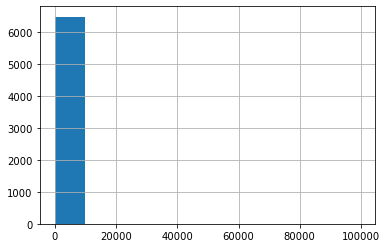

In [117]:
### See the distribution of COVID-19 Deaths

hist_price=df_combine["COVID_19_Deaths"].hist()
### We observe that most of the values are around 100,000

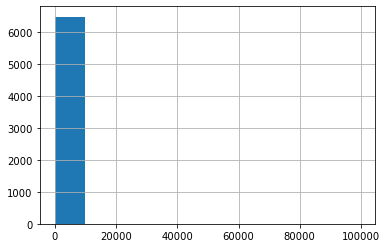

In [107]:
### Lets plot histogram for Covid 19 Deaths less than 100,000

hist_covid1=df_combine["COVID_19_Deaths"][df_combine["COVID_19_Deaths"]<100000].hist()

How many Covid Deaths more than 100,000?

In [108]:
df_combine[df_combine["COVID_19_Deaths"]>100000].shape

(4, 17)

we can see that only 4 listings have Covid deaths > 5000. These are maybe outliers but they can be valid values as well because some places may have large values of covid deaths. so we will not remove them.

In [118]:
### We use 100,000 as threshold for covid deaths

df_combine=df_combine[df_combine["COVID_19_Deaths"]<100000]

### Looking at the Covid deaths column again
df_combine["COVID_19_Deaths"].describe()

count     6485.000000
mean       328.687624
std       2092.437176
min          0.000000
25%          0.000000
50%         16.000000
75%        497.384535
max      99454.000000
Name: COVID_19_Deaths, dtype: float64

#### Now for Total_Deaths column 

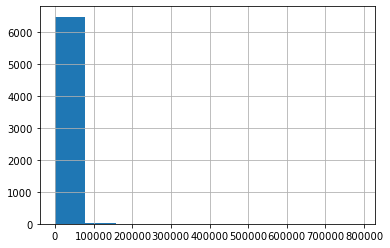

In [111]:
### See the distribution of Total_Deaths


hist_price=df_combine["Total_Deaths"].hist()
### We observe that most of the values are around 100,000

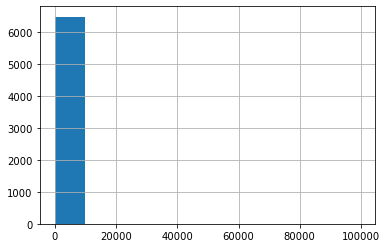

In [112]:
### Lets plot histogram for Covid 19 Deaths less than 100,000

hist_covid1=df_combine["COVID_19_Deaths"][df_combine["COVID_19_Deaths"]<100000].hist()

How many Covid Deaths more than 100,000?

In [108]:
df_combine[df_combine["COVID_19_Deaths"]>100000].shape

(4, 17)

we can see that only 4 listings have Covid deaths > 5000. These are maybe typing error during input. Nonetheless, since this records are skewing our data a lot, we will treat them as outliers and drop them

In [110]:
### We use 100,000 as threshold for covid deaths

df_combine=df_combine[df_combine["COVID_19_Deaths"]<100000]

### Looking at the Covid deaths column again
df_combine["COVID_19_Deaths"].describe()

count     6485.000000
mean       328.687624
std       2092.437176
min          0.000000
25%          0.000000
50%         16.000000
75%        497.384535
max      99454.000000
Name: COVID_19_Deaths, dtype: float64

                   COVID-19 Deaths
Age group                         
0-17 years                   294.0
1-4 years                     31.0
15-24 years                 1217.0
18-29 years                 3574.0
25-34 years                 6621.0
30-49 years                42697.0
35-44 years                18149.0
45-54 years                51424.0
5-14 years                   103.0
50-64 years               163239.0
55-64 years               131412.0
65-74 years               237767.0
75-84 years               299744.0
85 years and over         331277.0
All Ages                 1079446.0
Under 1 year                  58.0


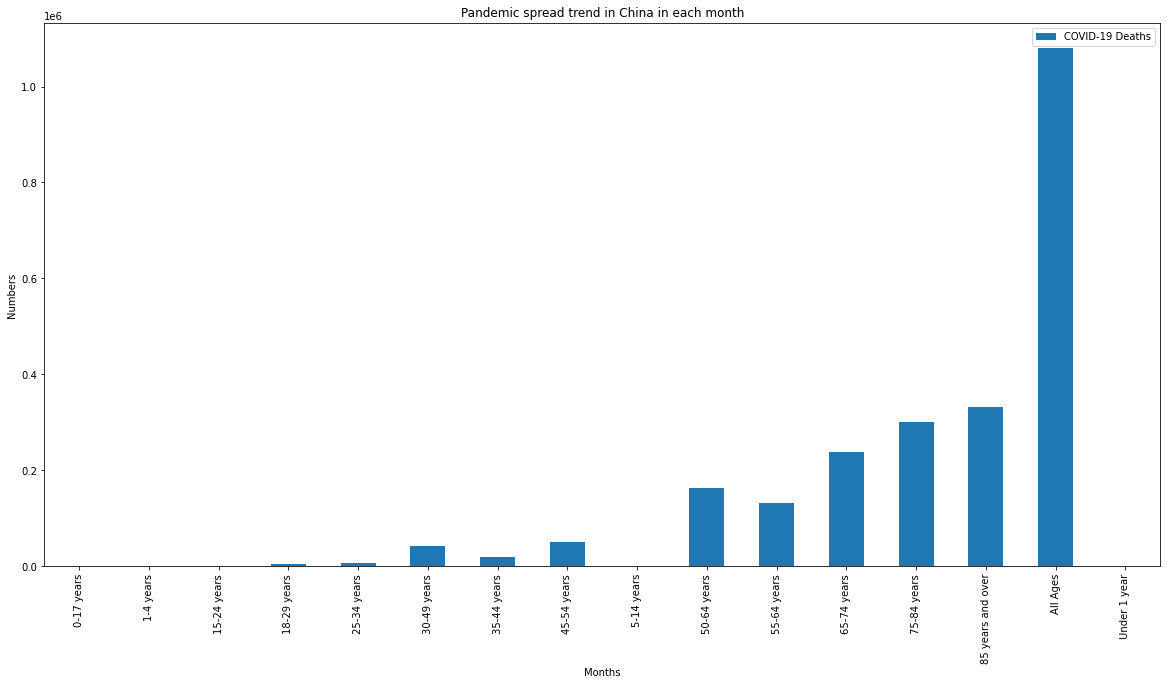

In [47]:
# month_group=df_combine.groupby(['Age group'])[['COVID-19 Deaths','Race and Hispanic Origin Group']]          # make groups according to 'month' and select only for China enteries
# sum_for_eachMonth=month_group.sum()

# print(sum_for_eachMonth)
# sum_for_eachMonth.plot(kind='bar',figsize=(20, 10))                                         # plot bar chart
# plt.title('Pandemic spread trend in China in each month')
# plt.ylabel('Numbers')
# plt.xlabel('Months')
# plt.show()


<AxesSubplot:xlabel='Age group', ylabel='COVID-19 Deaths'>

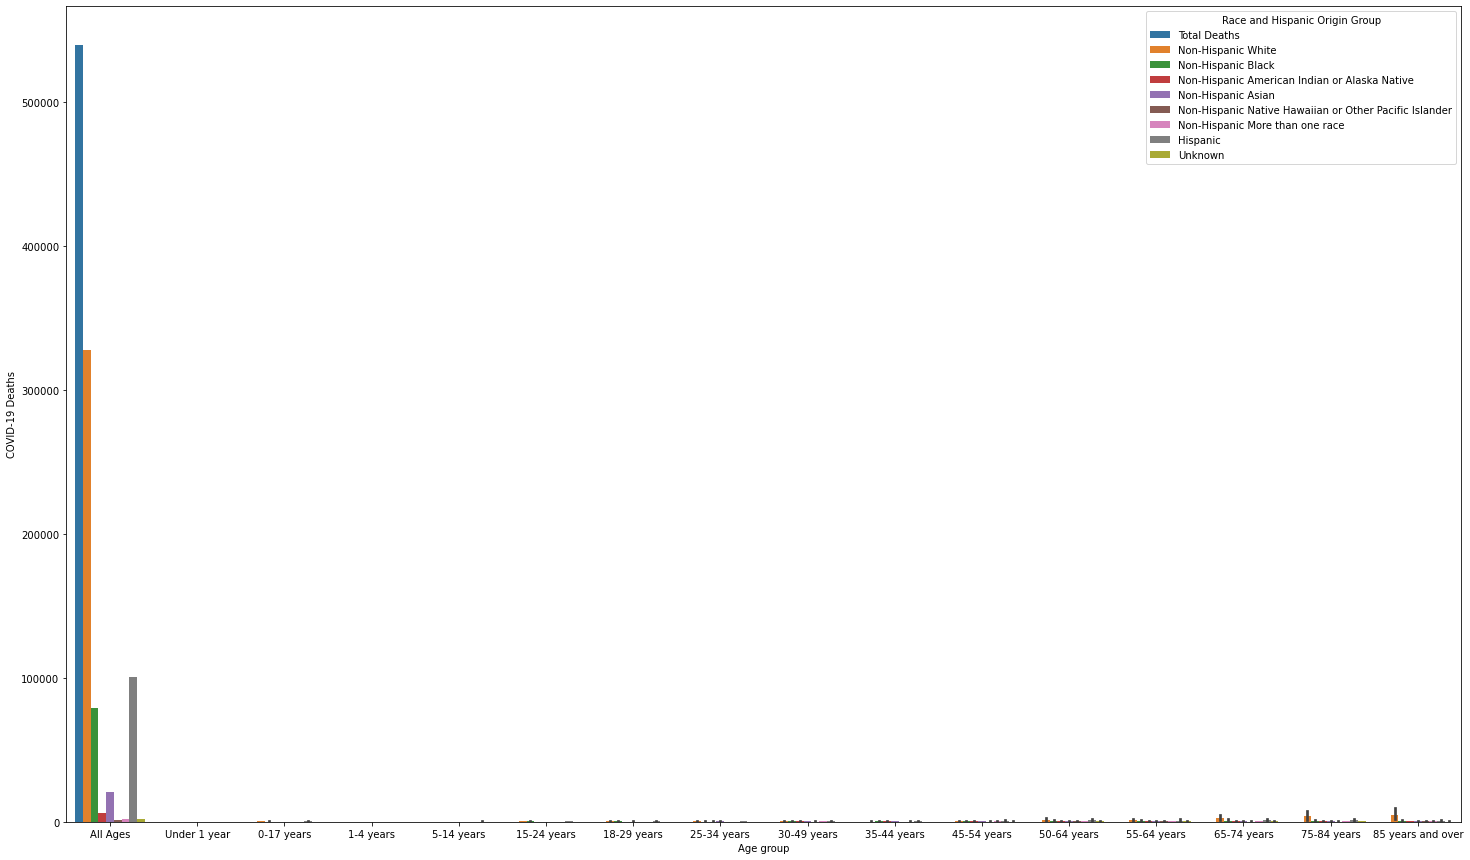

In [75]:
# # fig, ax = plt.subplots(figsize=(25, 15))
# sns.barplot(x="Age group", hue="Race and Hispanic Origin Group", y="COVID-19 Deaths", data=df_combine)

In [87]:
df_combine.dtypes

State                                        object
Age group                                    object
Race and Hispanic Origin Group               object
COVID-19 Deaths                             float64
Total Deaths                                float64
Pneumonia Deaths                            float64
Pneumonia and COVID-19 Deaths               float64
Influenza Deaths                            float64
Pneumonia, Influenza, or COVID-19 Deaths    float64
Condition Group                              object
Condition                                    object
COVID-19 Deaths_conditions                  float64
State_Cat                                     int32
Age group_Cat                                 int32
Race and Hispanic Origin Group_Cat            int32
Condition Group_Cat                           int32
Condition_Cat                                 int32
dtype: object

In [49]:
import psycopg2

In [50]:
try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "192.168.56.30",
        port = "5432",
    database = "postgres")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute("CREATE DATABASE covid1;")
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

Error while connecting to PostgreSQL database "covid1" already exists



In [65]:
df_combine.columns

Index(['State', 'Age_group', 'Race_and_Hispanic_Origin_Group',
       'COVID_19_Deaths', 'Total_Deaths', 'Pneumonia_Deaths',
       'Pneumonia_and_COVID_19_Deaths', 'Influenza_Deaths',
       'Pneumonia_Influenza_or_COVID_19_Deaths', 'Condition_Group',
       'Condition', 'COVID_19_Deaths_conditions', 'State_Cat', 'Age_group_Cat',
       'Race_and_Hispanic_Origin_Group_Cat', 'Condition_Group_Cat',
       'Condition_Cat'],
      dtype='object')

In [67]:

createString = """
CREATE TABLE COVID_COMBINE_TABLE(
    State VARCHAR,
    Age_group VARCHAR,
    Race_and_Hispanic_Origin_Group VARCHAR,
    COVID_19_Deaths integer,
    Total_Deaths integer,
    Pneumonia_Deaths integer,
    Pneumonia_and_COVID_19_Deaths integer,
    Influenza_Deaths integer,
    Pneumonia_Influenza_or_COVID_19_Deaths integer,
    Condition_Group VARCHAR,
    Condition VARCHAR, 
    COVID_19_Deaths_conditions integer,
    State_Cat integer,
    Age_group_Cat integer,
    Race_and_Hispanic_Origin_Group_Cat integer,
    Condition_Group_Cat integer, 
    Condition_Cat integer
);
"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "192.168.56.30",
        port = "5432",
        database = "covid1")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(createString)
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [62]:
cols

'State,Age_group,Race_and_Hispanic_Origin_Group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID_19_Deaths,Influenza_Deaths,Pneumonia_Influenza_or_COVID_19_Deaths,Condition_Group,Condition,COVID_19_Deaths_conditions,State_Cat,Age_group_Cat,Race_and_Hispanic_Origin_Group_Cat,Condition_Group_Cat,Condition_Cat'

In [68]:
# Creating a list of tupples from the dataframe values
tpls = [tuple(x) for x in df_combine.to_numpy()]
    
# dataframe columns with Comma-separated
cols = ','.join(list(df_combine.columns))

#cols = 'State,"Age group","Race and Hispanic Origin Group","COVID-19 Deaths","Total Deaths","Pneumonia Deaths","Pneumonia and COVID-19 Deaths","Influenza Deaths,Pneumonia, Influenza, or COVID-19 Deaths","Condition Group",Condition,"COVID-19 Deaths_conditions",State_Cat,Age group_Cat,"Race and Hispanic Origin Group_Cat","Condition Group_Cat",Condition_Cat'
table = "COVID_COMBINE_TABLE"

 

# SQL query to execute
sql = "INSERT INTO %s(%s) VALUES(%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s)" % (table, cols)

 

try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "192.168.56.30",
    port = "5432",
    database = "covid1")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.executemany(sql, tpls)
    print("Data inserted using execute_many() successfully...")
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

Data inserted using execute_many() successfully...


In [74]:
sql = """
    SELECT * FROM COVID_COMBINE_TABLE;
"""

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "192.168.56.30",
        port = "5432",
        database = "covid1")
    covid_df = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [75]:
covid_df.shape

(6489, 17)

In [77]:
covid_df.head()

,state,age_group,race_and_hispanic_origin_group,covid_19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths,condition_group,condition,covid_19_deaths_conditions,state_cat,age_group_cat,race_and_hispanic_origin_group_cat,condition_group_cat,condition_cat
0,United States,All Ages,Total Deaths,539723,4160118,466386,263173,9031,750721,Respiratory diseases,Influenza and pneumonia,350,46,14,7,9,11
1,United States,All Ages,Non-Hispanic White,328239,3047347,301454,149830,6038,485501,Respiratory diseases,Influenza and pneumonia,1603,46,14,6,9,11
2,United States,Under 1 year,Non-Hispanic White,14,9139,98,1,10,121,Respiratory diseases,Influenza and pneumonia,4314,46,15,6,9,11
3,United States,0-17 years,Non-Hispanic White,72,16860,287,14,84,429,Respiratory diseases,Influenza and pneumonia,12922,46,0,6,9,11
4,United States,1-4 years,Non-Hispanic White,12,1802,59,2,25,94,Respiratory diseases,Influenza and pneumonia,33277,46,1,6,9,11


In [ ]:
# import csv
# try:
#     dbConnection = psycopg2.connect(
#         user = "dap",
#         password = "dap",
#         host = "192.168.56.30",
#         port = "5432",
#         database = "covid1")
#     dbConnection.set_isolation_level(0) # AUTOCOMMIT
#     dbCursor = dbConnection.cursor()
#     insertString = "INSERT INTO weather4 VALUES ('{}',"+"{},"*19+"{})"
#     with open('D:/NCI/DAP/Lab/weather.csv', 'r') as f:
#         reader = csv.reader(f)
#         next(reader) # skip the header
#         for row in reader:
#             dbCursor.execute(insertString.format(*row))
#     dbConnection.commit()
#     dbCursor.close()
# except (Exception , psycopg2.Error) as dbError :
#     print ("Error:", dbError)
# finally:
#     if(dbConnection): dbConnection.close()